# Sample Terason Analysis

## Select Image & Phantom and Parse

In [54]:
from pyquantus.parse.terason import terasonRfParser

In [55]:
# Inputs
imagePath = "/Volumes/CREST Data/David_S_Data/Terason_Lymphedema_Data/62051-017/62051-017-03 Ld.mat"
phantomPath = "/Volumes/CREST Data/David_S_Data/Terason_Lymphedema_Data/image 4 phantom .mat.mat"

In [56]:
imgDataStruct, imgInfoStruct, refDataStruct, refInfoStuct = terasonRfParser(imagePath, phantomPath)

## ROI Selection (from GUI)

In [57]:
import pickle

pkl_name = "/Volumes/CREST Data/David_S_Data/Terason_Lymphedema_Data/a_sample_roi.pkl"

with open(pkl_name, "rb") as f:
    roi_info = pickle.load(f)

In [58]:
from pathlib import Path

assert roi_info["Image Name"] == Path(imagePath).name
assert roi_info["Phantom Name"] == Path(phantomPath).name

In [59]:
splineX = roi_info["Spline X"]
splineY = roi_info["Spline Y"]

## Analysis Config (from GUI)

In [60]:
from pyquantus.qus import AnalysisConfig

pkl_name = "/Volumes/CREST Data/David_S_Data/Terason_Lymphedema_Data/config.pkl"

with open(pkl_name, "rb") as f:
    config_info = pickle.load(f)
    
config = config_info["Config"]

## Spectral Analysis

In [61]:
from pyquantus.qus import SpectralAnalysis, UltrasoundImage

In [62]:
ultrasoundImage = UltrasoundImage()
ultrasoundImage.axialResRf = imgInfoStruct.axialRes
ultrasoundImage.lateralResRf = imgInfoStruct.lateralRes
ultrasoundImage.bmode = imgDataStruct.bMode
ultrasoundImage.phantomRf = refDataStruct.rf
ultrasoundImage.rf = imgDataStruct.rf

In [63]:
spectralAnalysis = SpectralAnalysis()
spectralAnalysis.ultrasoundImage = ultrasoundImage
spectralAnalysis.config = config
spectralAnalysis.splineX = splineX
spectralAnalysis.splineY = splineY

In [64]:
spectralAnalysis.generateRoiWindows()
spectralAnalysis.computeSpecWindows()

In [65]:
print(spectralAnalysis.attenuationCoef, spectralAnalysis.attenuationCorr)

1.0533015599836917 1.0


In [66]:
spectralAnalysis.backScatterCoef

0.04388768166554494

In [67]:
spectralAnalysis.nakagamiParams

(447.5414931452683, 0.15467310556419814)

In [68]:
print(spectralAnalysis.effectiveScattererDiameter, spectralAnalysis.effectiveScattererConcentration)

2.2246511088594058e-08 2.3767312690647974e+19


# Visualizations

In [69]:
import matplotlib.pyplot as plt
from pyquantus.qus import SpectralData

In [70]:
spectralData = SpectralData()
spectralData.spectralAnalysis = spectralAnalysis

In [71]:
spectralData.convertImagesToRGB()

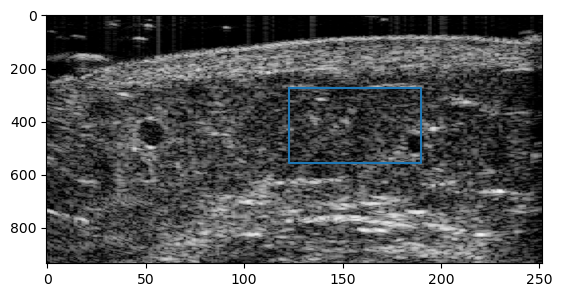

In [72]:
quotient = imgInfoStruct.depth / imgInfoStruct.width
plt.imshow(spectralData.finalBmode, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))
plt.plot(spectralData.splineX, spectralData.splineY)

In [73]:
spectralData.drawCmaps()

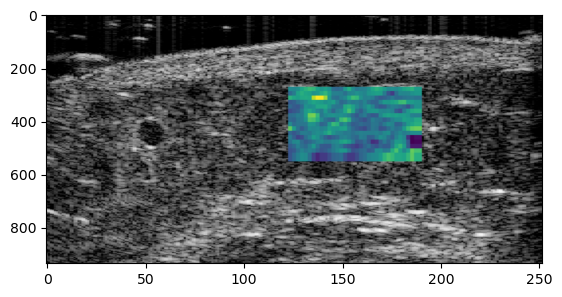

In [74]:
plt.imshow(spectralData.mbfIm, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))

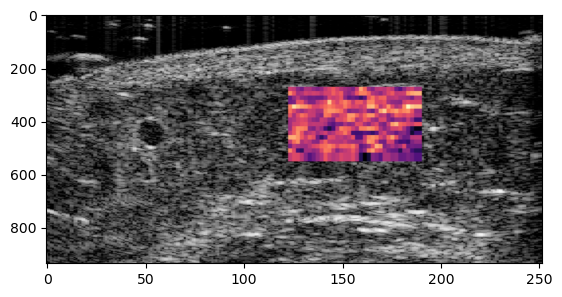

In [75]:
plt.imshow(spectralData.ssIm, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))

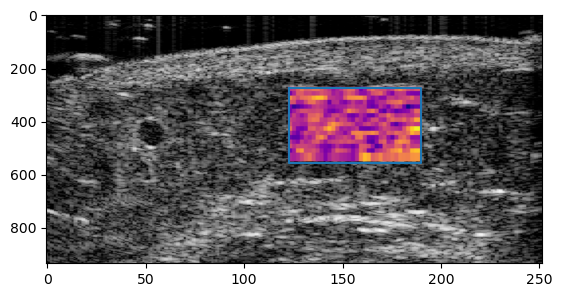

In [76]:
plt.imshow(spectralData.siIm, aspect=quotient*(spectralData.finalBmode.shape[1]/spectralData.finalBmode.shape[0]))
plt.plot(spectralData.splineX, spectralData.splineY)

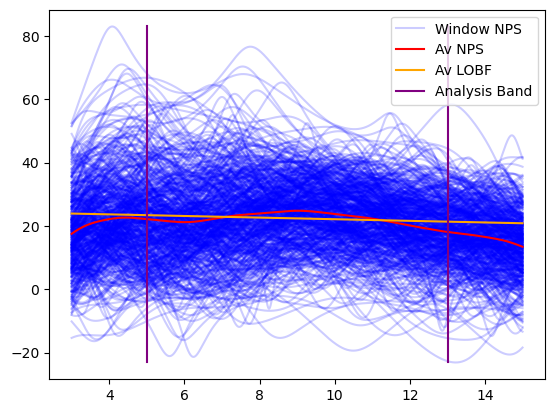

In [77]:
spectralData.plotPsData()